In [1]:
#Importing required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from scipy import stats
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot


In [2]:
#Reading Data
Toyota = pd.read_excel('Toyota.xlsx',usecols=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"])
Toyota.head(10)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [3]:
Toyota.shape

(1436, 9)

In [4]:
Toyota.info()
#No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [5]:
Toyota.duplicated().sum()

1

In [6]:
Toyota.drop_duplicates(inplace=True)

In [7]:
Toyota.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1435.0,10720.915679,3608.732978,4350.0,8450.0,9900.0,11950.0,32500.0
Age_08_04,1435.0,55.980488,18.563312,1.0,44.0,61.0,70.0,80.0
KM,1435.0,68571.782578,37491.094553,1.0,43000.0,63451.0,87041.5,243000.0
HP,1435.0,101.491986,14.981408,69.0,90.0,110.0,110.0,192.0
cc,1435.0,1576.560976,424.387533,1300.0,1400.0,1600.0,1600.0,16000.0
Doors,1435.0,4.032753,0.952667,2.0,3.0,4.0,5.0,5.0
Gears,1435.0,5.026481,0.188575,3.0,5.0,5.0,5.0,6.0
Quarterly_Tax,1435.0,87.020209,40.959588,19.0,69.0,85.0,85.0,283.0
Weight,1435.0,1072.287108,52.251882,1000.0,1040.0,1070.0,1085.0,1615.0


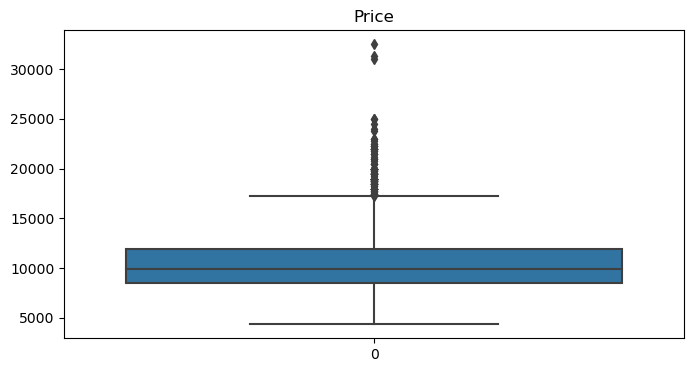

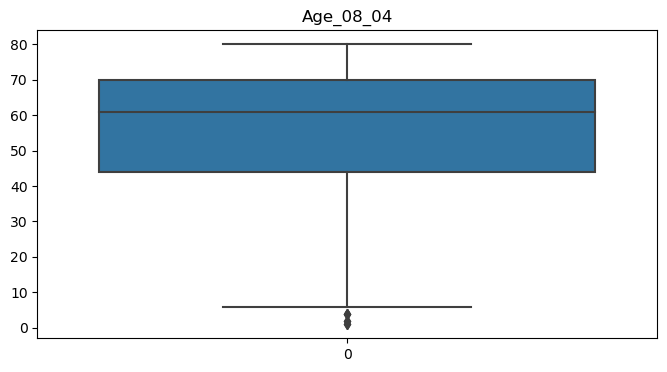

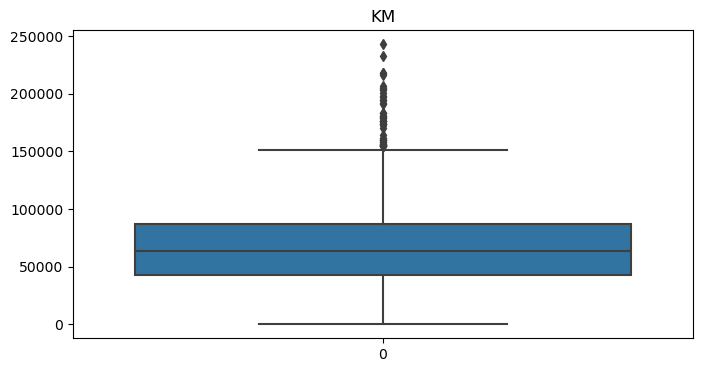

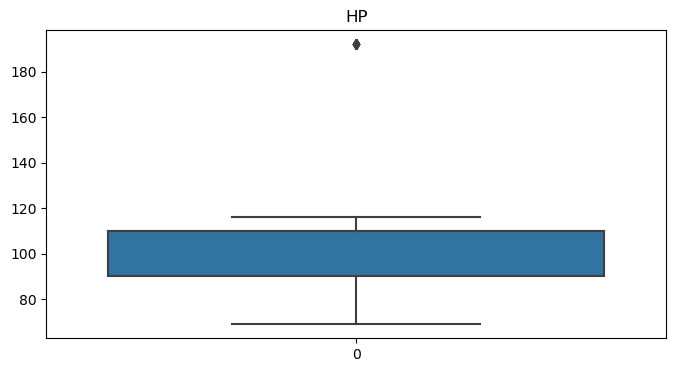

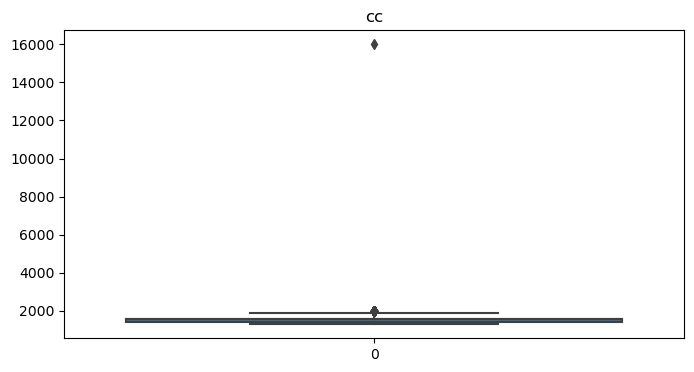

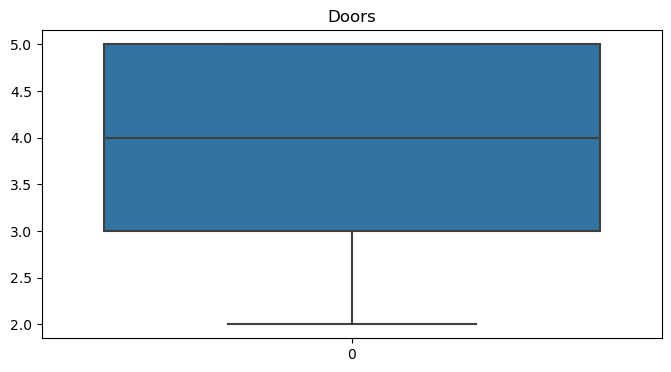

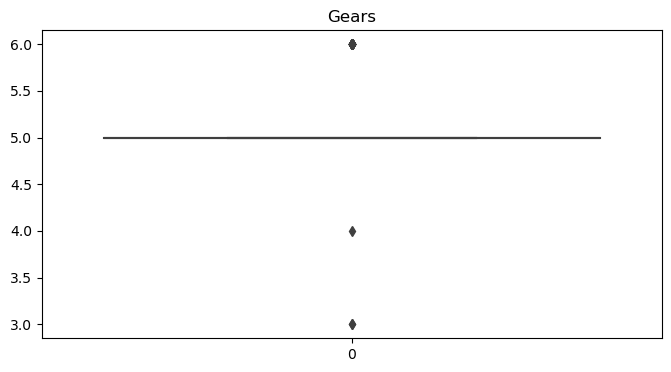

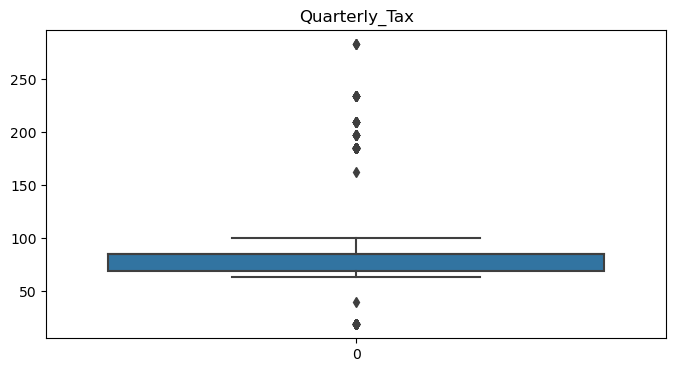

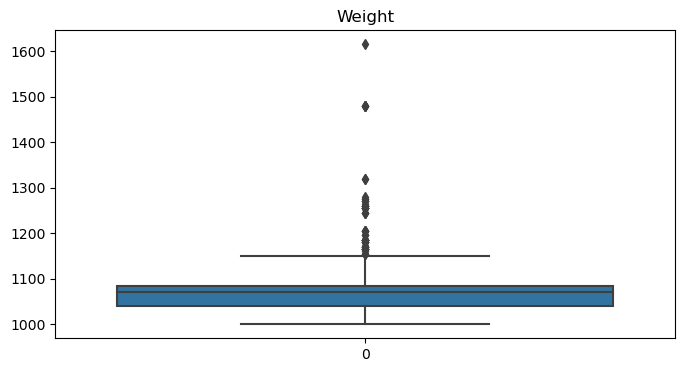

In [8]:
for Var in Toyota.columns:
    plt.figure(figsize = (8,4))
    sns.boxplot(data= Toyota[Var])
    plt.title(Var)
    plt.show()

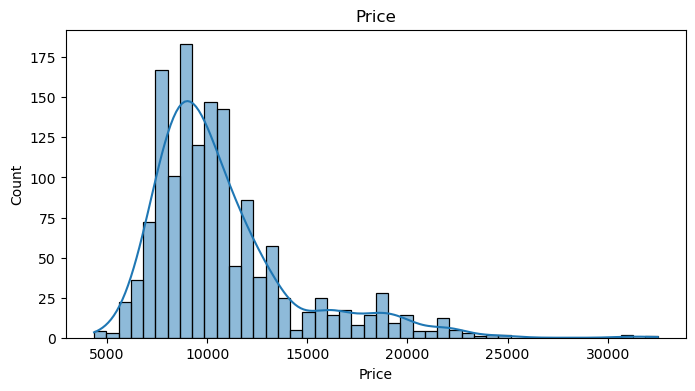

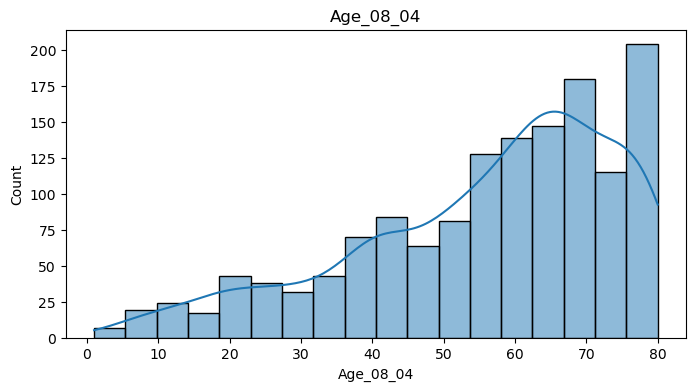

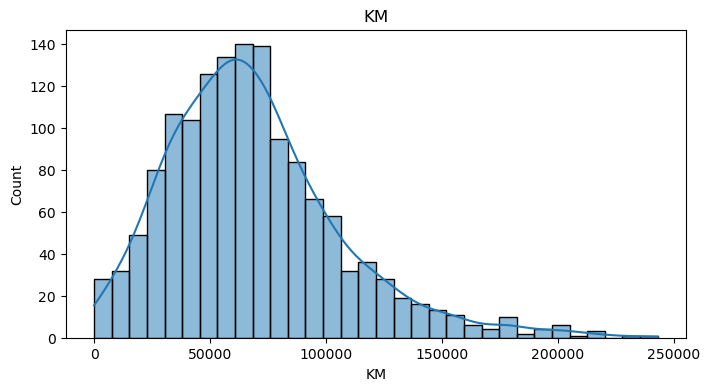

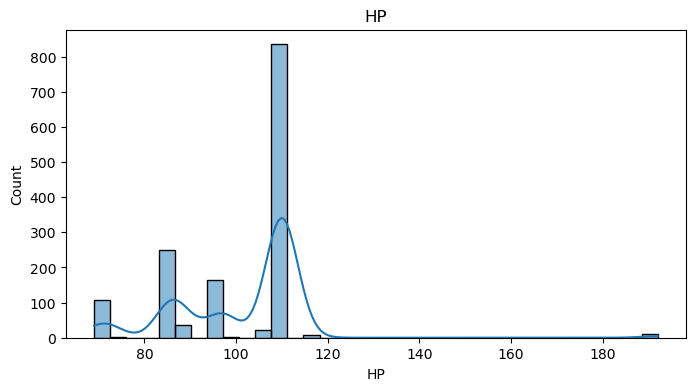

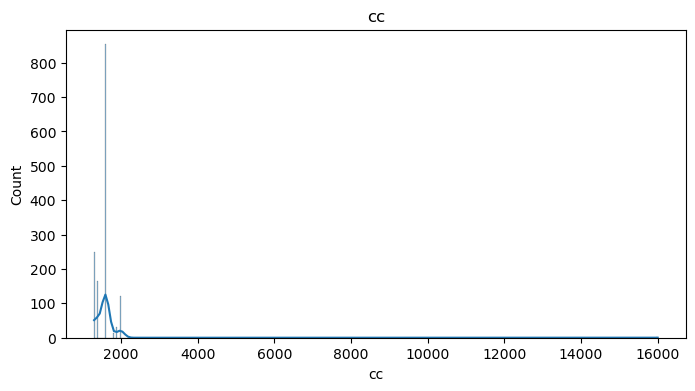

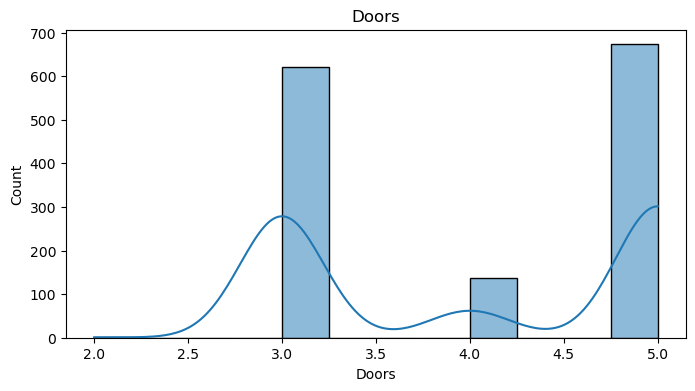

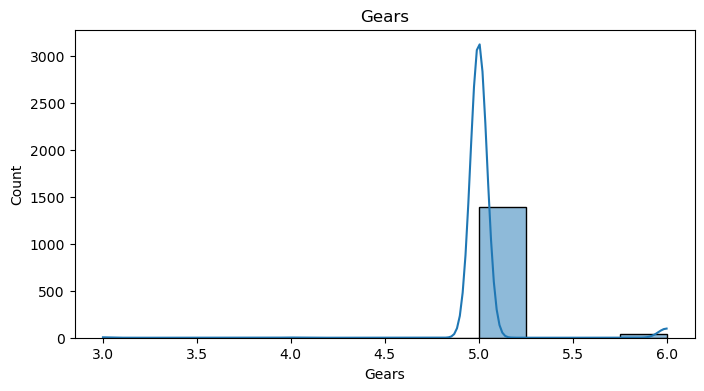

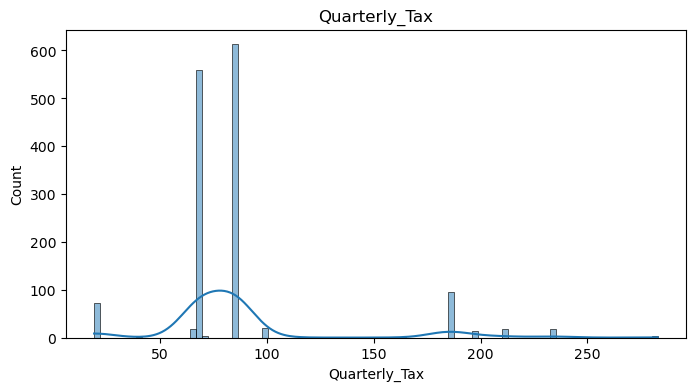

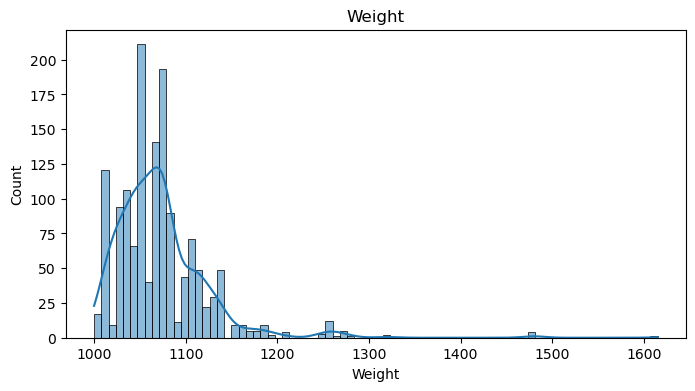

In [9]:
for Var in Toyota.columns:
    plt.figure(figsize = (8,4))
    sns.histplot(data= Toyota[Var],kde=True)
    plt.title(Var)
    plt.show()

<Figure size 800x400 with 0 Axes>

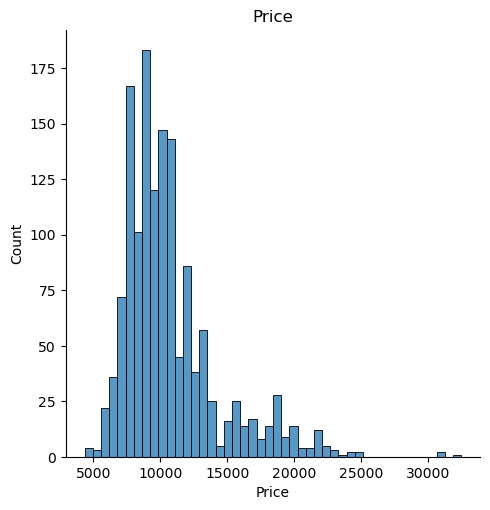

<Figure size 800x400 with 0 Axes>

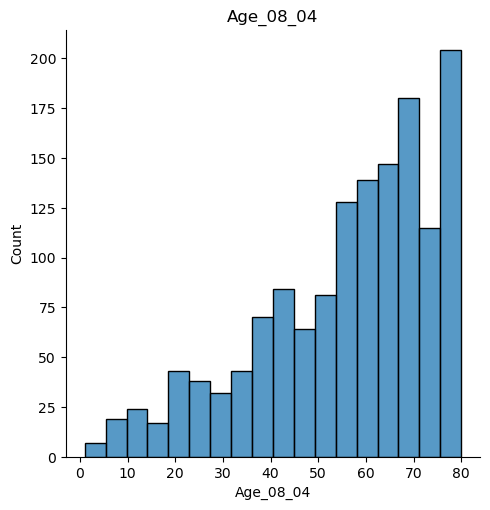

<Figure size 800x400 with 0 Axes>

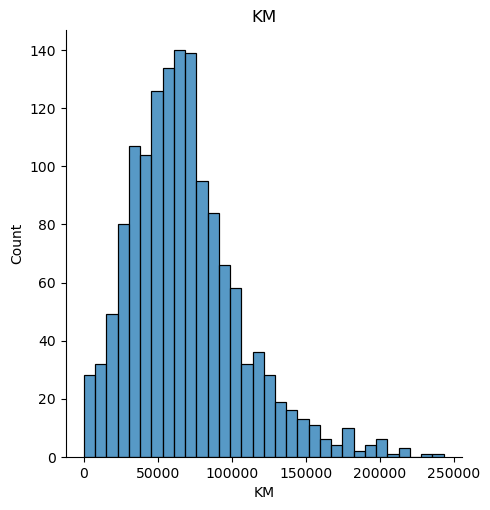

<Figure size 800x400 with 0 Axes>

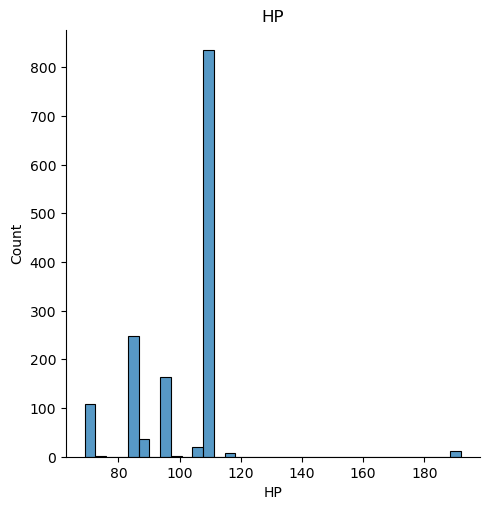

<Figure size 800x400 with 0 Axes>

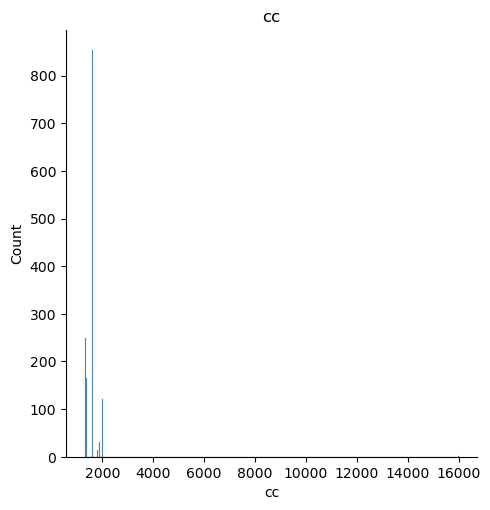

<Figure size 800x400 with 0 Axes>

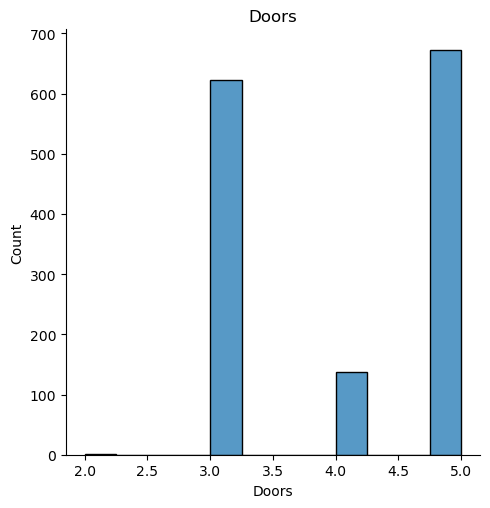

<Figure size 800x400 with 0 Axes>

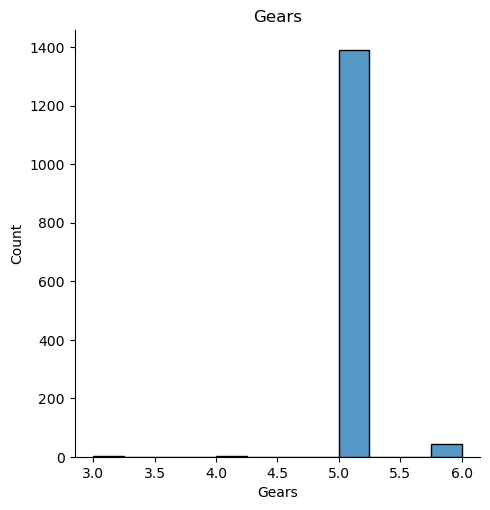

<Figure size 800x400 with 0 Axes>

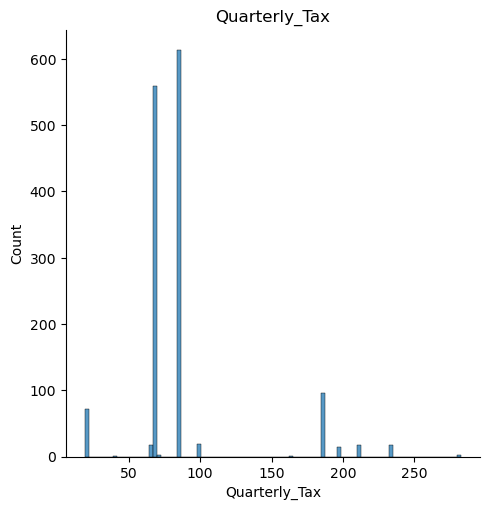

<Figure size 800x400 with 0 Axes>

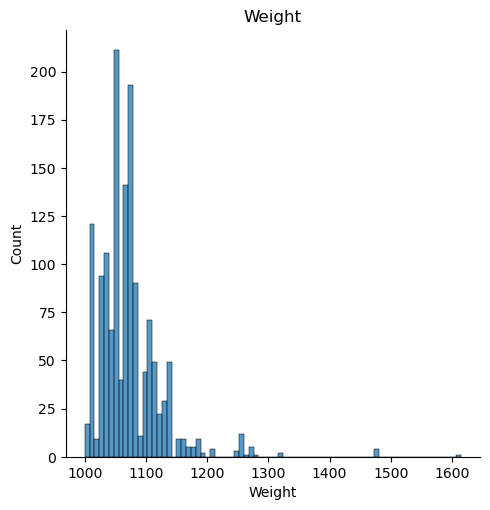

In [10]:
for Var in Toyota.columns:
    plt.figure(figsize = (8,4))
    sns.displot(data= Toyota[Var])
    plt.title(Var)
    plt.show()

In [11]:
Toyota.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


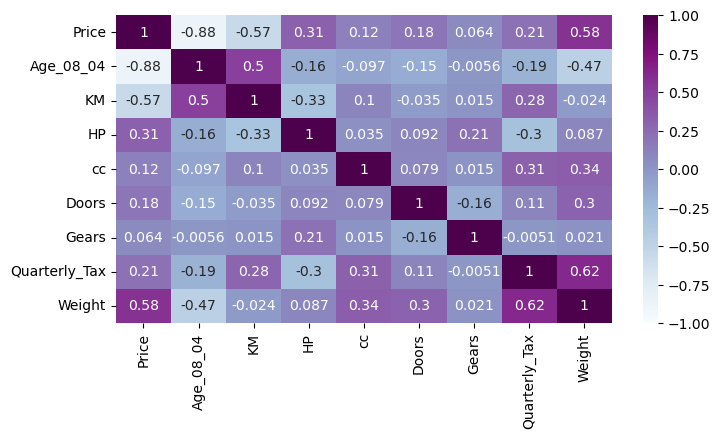

In [12]:
plt.figure(figsize=(8,4))
sns.heatmap(Toyota.corr(),vmax = 1,vmin=-1,annot=True,cmap='BuPu')
plt.show()

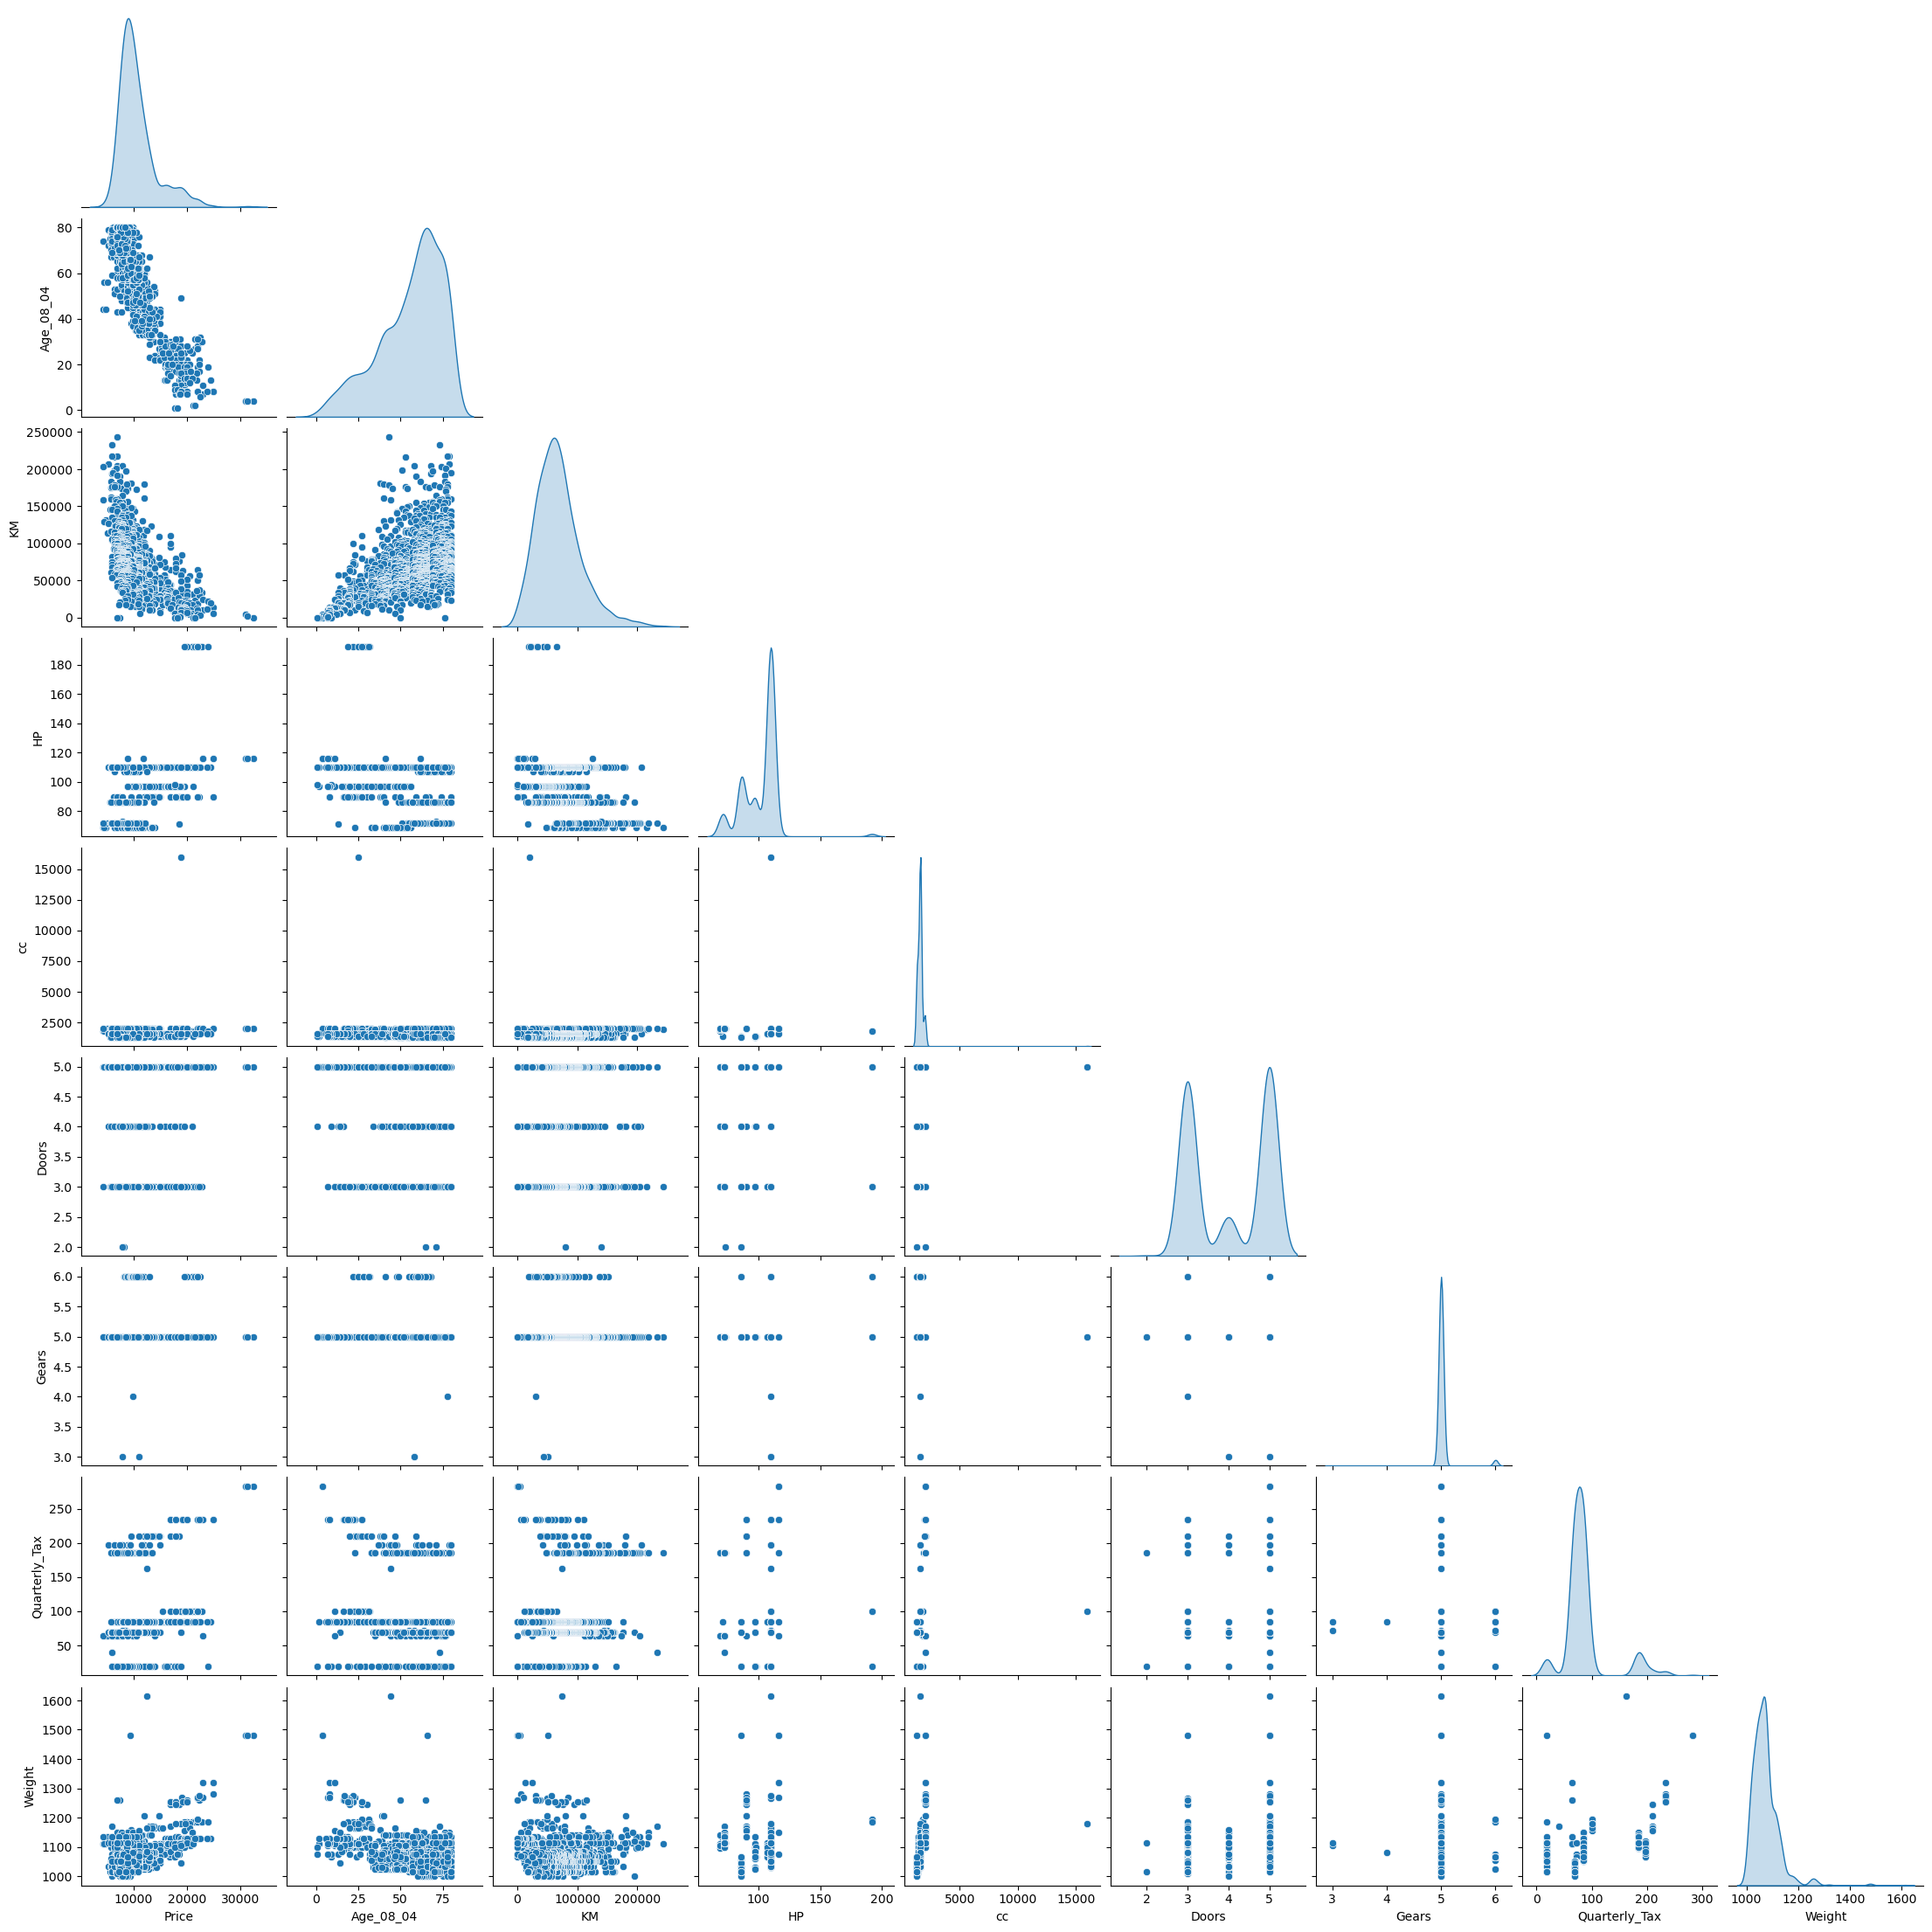

In [13]:
sns.pairplot(Toyota,corner=True,diag_kind='kde')
plt.show()

In [14]:
#Z-score normlization:
scaler = StandardScaler()
Toyota_ = scaler.fit_transform(Toyota)
Toyota_z = pd.DataFrame(Toyota_, columns=Toyota.columns)
Toyota_z.tail()


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1430,-0.892845,0.701602,-1.281492,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-0.905299
1431,0.034396,0.863267,-1.322689,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747
1432,-0.615643,0.809379,-1.375627,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747
1433,-0.962145,0.755490,-1.378295,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747
1434,-1.045306,1.078821,-1.829626,0.568103,0.055249,1.015659,-0.140475,-1.661245,0.798582


In [15]:
Y = Toyota_z['Price']
X = Toyota_z.drop('Price',axis = 1)

In [16]:
#Checking for Multi-coliniarity:
def vif_cal(input_data):
    x_var = input_data
    x_cols = input_data.columns
    for i in range(0,x_cols.shape[0]):
        y = x_var[x_cols[i]]
        x = x_var[x_cols.drop(x_cols[i])]
        rsq = smf.ols(formula = 'y~x',data = x_var).fit().rsquared
        vif = round(1/(1-rsq),2)
        print(x_cols[i], 'VIF = ', vif)

In [17]:
vif_cal(X)  
# None >10

Age_08_04 VIF =  1.88
KM VIF =  1.76
HP VIF =  1.42
cc VIF =  1.16
Doors VIF =  1.16
Gears VIF =  1.1
Quarterly_Tax VIF =  2.3
Weight VIF =  2.49


In [18]:
#Deleting Doors  and Gears from original Toyota data:
#Z-score normlization:
scaler = StandardScaler()
Toyota = Toyota.drop(['Doors','Gears'],axis=1)
Toyota_ = scaler.fit_transform(Toyota)
Toyota_z = pd.DataFrame(Toyota_, columns=Toyota.columns)
Toyota_z.tail()


,Price,Age_08_04,KM,HP,cc,Quarterly_Tax,Weight
1430,-0.892845,0.701602,-1.281492,-1.034441,-0.651898,-0.440104,-0.905299
1431,0.034396,0.863267,-1.322689,-1.034441,-0.651898,-0.440104,-1.096747
1432,-0.615643,0.809379,-1.375627,-1.034441,-0.651898,-0.440104,-1.096747
1433,-0.962145,0.755490,-1.378295,-1.034441,-0.651898,-0.440104,-1.096747
1434,-1.045306,1.078821,-1.829626,0.568103,0.055249,-1.661245,0.798582


In [19]:
y = Toyota_z['Price']
X = Toyota_z.drop('Price',axis = 1)

In [20]:
vif_cal(X)  


Age_08_04 VIF =  1.88
KM VIF =  1.75
HP VIF =  1.34
cc VIF =  1.16
Quarterly_Tax VIF =  2.27
Weight VIF =  2.33


## Creating model:

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.1465959826039421
R-squared: 0.8409801591491388


In [25]:
#Alternate:
model2 = smf.ols('Price~Age_08_04+KM+HP+cc+Quarterly_Tax+Weight',data=Toyota_z).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1482.
Date:                Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:48:31   Log-Likelihood:                -617.26
No. Observations:                1435   AIC:                             1249.
Df Residuals:                    1428   BIC:                             1285.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.154e-15      0.010  -1.17e-13      1.000      -0.019       0.019
Age_08_04        -0.6268      0.013    -46.487      0.000      -0.653      -0.600
KM               -0.2126      0.013    -16.340      0.000      -0.238      -0.187
HP                0.1395      0.011     12.261      0.000       0.117       0.162
cc               -0.0143      0.011     -1.351      0.177      -0.035       0.006
Quarterly_Tax     0.0466      0.015      3.137      0.002       0.017       0.076
Weight            0.2421      0.015     16.122      0.000       0.213       0.272
==============================================================================
Omnibus:                      146.239   Durbin-Watson:                   1.549
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              942.220
Skew:                          -0.206   Prob(JB):                    2.51e-205
Kurtosis:                       6.948   Cond. No.                         2.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Normal QQ plot of Residuals')

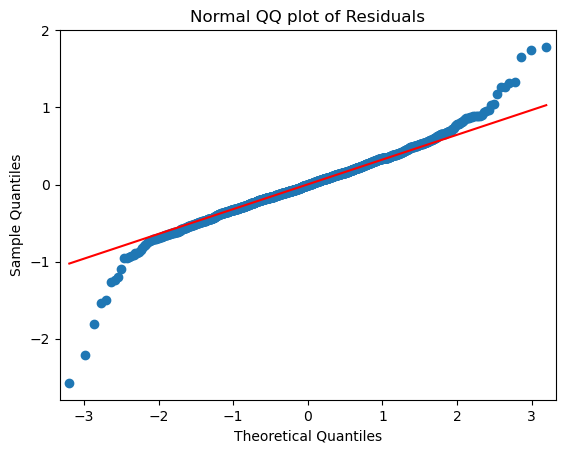

In [26]:
qqplot = sm.qqplot(model2.resid,line = 'q')
plt.title("Normal QQ plot of Residuals")
#plt.show()

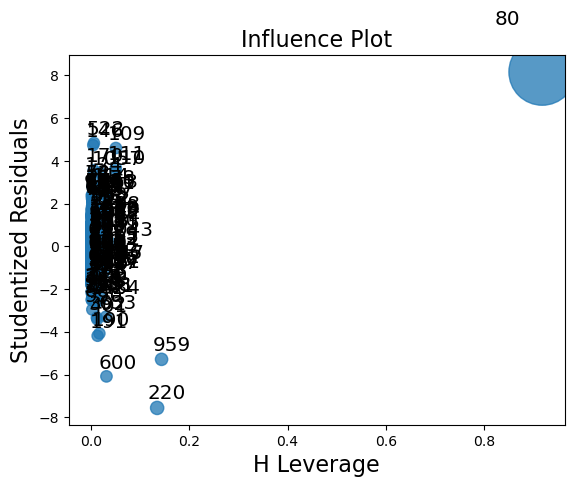

In [27]:
#Identifying and removing influencers
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2)
plt.show()

In [28]:
index_label_to_drop = 80
Toyota_z.drop(index_label_to_drop, inplace=True)
Toyota_z.reset_index(drop=True,inplace=True)

In [29]:
model3 = smf.ols('Price~Age_08_04+KM+HP+cc+Quarterly_Tax+Weight',data=Toyota_z).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1554.
Date:                Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:48:33   Log-Likelihood:                -584.63
No. Observations:                1434   AIC:                             1183.
Df Residuals:                    1427   BIC:                             1220.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0072      0.010     -0.748      0.455      -0.026       0.012
Age_08_04        -0.6205      0.013    -46.983      0.000      -0.646      -0.595
KM               -0.1824      0.013    -13.768      0.000      -0.208      -0.156
HP                0.1702      0.012     14.492      0.000       0.147       0.193
cc               -0.2965      0.036     -8.213      0.000      -0.367      -0.226
Quarterly_Tax     0.1050      0.016      6.486      0.000       0.073       0.137
Weight            0.2863      0.016     18.294      0.000       0.256       0.317
==============================================================================
Omnibus:                      234.125   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2413.958
Skew:                          -0.416   Prob(JB):                         0.00
Kurtosis:                       9.302   Cond. No.                         5.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual Plot for Homoscedasticity

In [30]:
def get_standardized_values(x):
    return (x-x.mean())/x.std()

C:\Users\Anup0\AppData\Local\Temp\ipykernel_14896\601816039.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(get_standardized_values(model3.fittedvalues),get_standardized_values(model3.resid),cmap='PuBu')


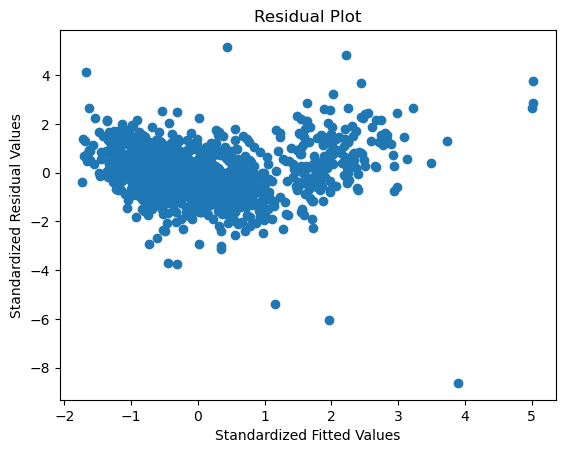

In [31]:
plt.scatter(get_standardized_values(model3.fittedvalues),get_standardized_values(model3.resid),cmap='PuBu')
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()